In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import glob
import scipy
import scipy.stats

In [2]:
###FISH DATA
fish_cell_files = glob.glob(r'D:\\fish\\*\\*.cells.*')
fish_dots_files = glob.glob(r'D:\\fish\\*\\*.dots.*')
dots           = pandas.concat([pandas.read_csv(file) for file in fish_dots_files],sort=False)
dots           = dots[['x','y','intensity','frame','label','nuclear','tss','file']]
dots['strain'] = [str(file).split('_')[0] for file in dots.file]
cells           = pandas.concat([pandas.read_csv(file) for file in fish_cell_files],sort=False)
cells           = cells[['label','total','nuclear','cytoplasmic','tss_intensity','mean_intensity','area','eccentricity','file']]
cells['strain'] = [str(file).split('_')[0] for file in cells.file]

In [3]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 24

In [4]:
gamma     = scipy.special.gamma
F1        = scipy.special.hyp1f1
exp       = scipy.exp
factorial = scipy.special.factorial
#eq from raj et al 2006
pmRNA = lambda x,a,b,e,d: gamma(a / d + x) / gamma(x + 1) / gamma( a / d + b / d + x ) * gamma(a/d + b/d) / gamma(a/d) * (e/d) ** x * F1(a/d+x,a/d+b/d+x,-e/d)        
def pmRNA(m, a, b, e, d):
    #eq from sharezaei et al 2008 pnas swain
    l0,l1,ms = a/d , b/d, e/d
    p1 = ms**m * exp(-ms) / factorial(m)
    p2 = gamma(l0+m) * gamma(l0+l1) / gamma(l0+l1+m) / gamma(l0)
    p3 = F1(l1, l0+l1+m, ms)
    return(p1*p2*p3)

In [5]:
cells['strain'].unique()

array(['yTL19', 'yTL362', 'yTL400', 'yTL401', 'yTL402', 'yTL399',
       'yTL403', 'nan', 'yRS48', 'yRS54', 'yRS55', 'yRS52'], dtype=object)

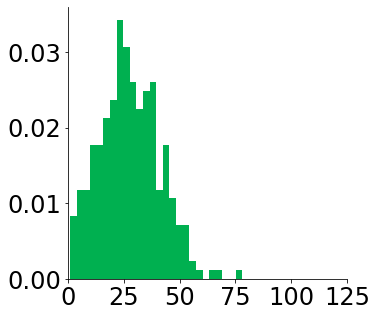

In [6]:
data = cells[cells.strain=='yTL399'].total
plt.figure(figsize=(5,5))
plt.hist(data, color = '#00b050',bins=26,density=True)
plt.xlim([0,125])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(scipy.arange(0,126,25))
ax.set_yticks(scipy.arange(0,0.04,0.01))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\tmp_figures\chd1FISH20211911.svg',format='svg',transparent=True)


[38.34028194  3.14016019  0.95871861  0.71790135]
[8.77567938e-06 7.18747478e-07 7.48524242e-01 1.00000000e+00]
1.1468531468531469
0.267780999488316


array([1.40410870e-07, 1.14999596e-08, 1.19763879e-02, 1.60000000e-02])

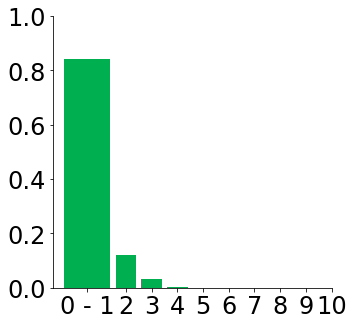

In [7]:
strain = 'yTL399'
singleTranscript = scipy.median(dots[(dots.strain==strain)&(dots.nuclear==0)].intensity)
data        = cells[cells.strain==strain].tss_intensity
discritized = scipy.around(data/singleTranscript)
mu          = scipy.mean(discritized)
var         = scipy.var(discritized)
freqs       = scipy.concatenate([scipy.bincount(discritized)/len(data), [0]*4])
x           = scipy.arange(len(freqs))
fit,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x[2:], ydata  = freqs[2:], p0  = [1,1,1,1], bounds = [0,100], maxfev=1000)


plt.figure(figsize=(5,5))
plt.bar(x[2:], freqs[2:],color='#00b050',zorder=-1)
plt.bar(0.5, scipy.sum(freqs[:2]),color='#00b050',zorder=-1,width=1.8)
# plt.scatter(x[2:], pmRNA(x[2:],*fit),color='black',marker='^')
# plt.scatter(scipy.mean(x[:2]), scipy.sum(pmRNA(x[:2],*fit)),color='black',marker='^')
plt.xticks([0.5,2,3,4,5,6,7,8,9,10],['0 - 1']+[str(i) for i in range(2,11)])

y = scipy.stats.poisson.pmf(x,mu)
#plt.scatter(x[2:],y[2:],color='black')
#plt.scatter(scipy.mean(x[:2]),scipy.sum(y[:2]),color='black')
plt.ylim([0,1])
#plt.scatter(x[2:], pmRNA(x[2:],*(fit/fit[-1])),color='black')

print(scipy.sqrt(scipy.diag(cov)))
print(fit/fit[-1])
print(mu)
print(var/mu)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(r'C:\Users\Robert Shelansky\Desktop\tmp_figures\chd1nascentFISH20211911.svg',format='svg',transparent=True)
fit/fit[-1]*0.016

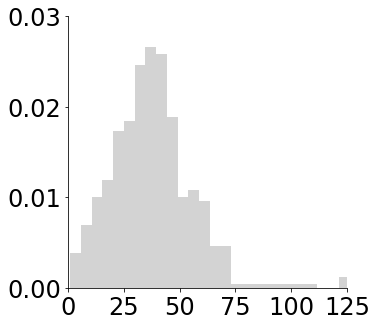

In [8]:
data = cells[cells.strain=='yTL362'].total
plt.figure(figsize=(5,5))
plt.hist(data, color = 'lightgrey',bins=26,density=True)
plt.xlim([0,125])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(scipy.arange(0,126,25))
ax.set_yticks(scipy.arange(0,0.04,0.01))

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\tmp_figures\FISH.svg',format='svg',transparent=True)


[3.92628089e+01 2.73865886e+00 1.68804911e+07 1.03536689e+07]
[1.16295710e-06 8.11185009e-08 1.63038784e+00 1.00000000e+00]
1.767097966728281
0.642943874275903


array([1.86073136e-08, 1.29789601e-09, 2.60862055e-02, 1.60000000e-02])

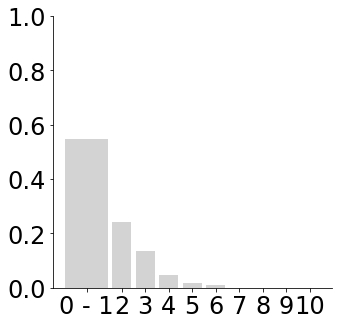

In [9]:
strain = 'yTL362'
singleTranscript = scipy.median(dots[(dots.strain==strain)&(dots.nuclear==0)].intensity)
data        = cells[cells.strain==strain].tss_intensity
discritized = scipy.around(data/singleTranscript)
mu          = scipy.mean(discritized)
var         = scipy.var(discritized)
freqs       = scipy.concatenate([scipy.bincount(discritized)/len(data), [0]*4])
x           = scipy.arange(len(freqs))
fit,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x[2:], ydata  = freqs[2:], p0  = [1,1,1,1], bounds = [0,100], maxfev=1000)


plt.figure(figsize=(5,5))
plt.bar(x[2:], freqs[2:],color='lightgrey',zorder=-1)
plt.bar(0.5, scipy.sum(freqs[:2]),color='lightgrey',zorder=-1,width=1.8)
# plt.scatter(x[2:], pmRNA(x[2:],*fit),color='black',marker='^')
# plt.scatter(scipy.mean(x[:2]), scipy.sum(pmRNA(x[:2],*fit)),color='black',marker='^')
plt.xticks([0.5,2,3,4,5,6,7,8,9,10],['0 - 1']+[str(i) for i in range(2,11)])

y = scipy.stats.poisson.pmf(x,mu)
#plt.scatter(x[2:],y[2:],color='black')
#plt.scatter(scipy.mean(x[:2]),scipy.sum(y[:2]),color='black')
plt.ylim([0,1])
#plt.scatter(x[2:], pmRNA(x[2:],*(fit/fit[-1])),color='black')

print(scipy.sqrt(scipy.diag(cov)))
print(fit/fit[-1])
print(mu)
print(var/mu)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(r'C:\Users\Robert Shelansky\Desktop\tmp_figures\WT_nascent_FISH.svg',format='svg',transparent=True)
fit/fit[-1]*0.016

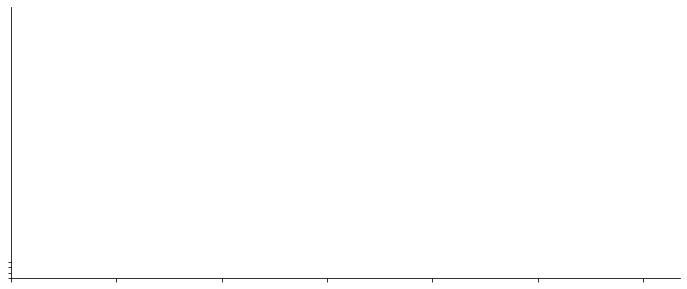

In [10]:
data = cells[cells.strain=='yTL362'].total
bins = scipy.bincount(data)/len(data)
x    = scipy.arange(len(bins))
mu   = scipy.median(data)
pois = scipy.stats.poisson.pmf(x,mu)
fit,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x, ydata  = bins, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)



plt.figure(figsize=(12,5))
#plt.fill_between(x,pmRNA(x,*fit362),color='darkblue',alpha=0.8)
#plt.plot(x,pmRNA(x,*fit),color='black',lw=4)
#plt.plot(x,pois,color='black',linestyle='--',lw=4)
plt.yticks(scipy.arange(0,0.08,0.02),[])
plt.xticks(scipy.arange(0,125,20),[])

#plt.bar(x,bins,color='darkblue',width=0.95,edgecolor='black')
plt.xlim([0,len(bins)])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure3A.svg',format='svg',transparent=True)

# plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049))
# plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0),alpha=0.5)

In [11]:
list(data)

[54.0,
 37.0,
 25.0,
 41.0,
 52.0,
 58.0,
 37.0,
 70.0,
 39.0,
 21.0,
 42.0,
 39.0,
 45.0,
 47.0,
 40.0,
 29.0,
 23.0,
 41.0,
 54.0,
 41.0,
 42.0,
 40.0,
 52.0,
 17.0,
 25.0,
 38.0,
 31.0,
 59.0,
 39.0,
 40.0,
 13.0,
 29.0,
 48.0,
 38.0,
 49.0,
 30.0,
 31.0,
 39.0,
 3.0,
 49.0,
 71.0,
 21.0,
 34.0,
 41.0,
 17.0,
 13.0,
 42.0,
 34.0,
 50.0,
 39.0,
 36.0,
 38.0,
 32.0,
 53.0,
 2.0,
 30.0,
 46.0,
 27.0,
 18.0,
 36.0,
 59.0,
 31.0,
 8.0,
 21.0,
 69.0,
 67.0,
 14.0,
 20.0,
 43.0,
 72.0,
 55.0,
 45.0,
 11.0,
 51.0,
 33.0,
 13.0,
 69.0,
 30.0,
 28.0,
 40.0,
 70.0,
 62.0,
 61.0,
 41.0,
 20.0,
 32.0,
 42.0,
 23.0,
 22.0,
 101.0,
 54.0,
 41.0,
 32.0,
 7.0,
 24.0,
 37.0,
 44.0,
 17.0,
 53.0,
 35.0,
 40.0,
 63.0,
 35.0,
 53.0,
 78.0,
 46.0,
 51.0,
 57.0,
 67.0,
 25.0,
 21.0,
 37.0,
 15.0,
 27.0,
 43.0,
 36.0,
 27.0,
 66.0,
 27.0,
 43.0,
 10.0,
 69.0,
 9.0,
 25.0,
 41.0,
 30.0,
 35.0,
 45.0,
 42.0,
 46.0,
 16.0,
 49.0,
 37.0,
 5.0,
 32.0,
 26.0,
 30.0,
 27.0,
 28.0,
 28.0,
 38.0,
 50.0,
 23.0,
 57.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


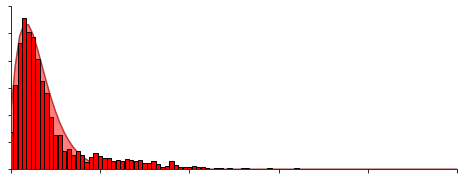

In [12]:
data362    = cells[cells.strain=='yTL362'].total
bins362    = scipy.bincount(data362)/len(data362)
x362       = scipy.arange(len(bins362))
fit362,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x362, ydata  = bins362, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data399    = cells[cells.strain=='yTL399'].total
bins399    = scipy.bincount(data399)/len(data399)
x399       = scipy.arange(len(bins399))
fit399,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x399, ydata  = bins399, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data400    = cells[cells.strain=='yTL400'].total
bins400    = scipy.bincount(data400)/len(data400)
x400       = scipy.arange(len(bins400))
fit400,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x400, ydata  = bins400, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data401    = cells[cells.strain=='yTL401'].total
bins401    = scipy.bincount(data401)/len(data401)
x401       = scipy.arange(len(bins401))
fit401,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x401, ydata  = bins401, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data402    = cells[cells.strain=='yTL402'].total
bins402    = scipy.bincount(data402)/len(data402)
x402       = scipy.arange(len(bins402))
fit402,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x402, ydata  = bins402, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)

# x    = scipy.arange(len(bins))
plt.figure(figsize=(8,3))
cmap = plt.get_cmap('bwr')
# plt.plot(x,pois,color='black',linestyle='--',lw=4)
# plt.plot(x,pmRNA(x,*fit362),color='black',alpha=0.5,zorder=3)
# plt.fill_between(x,pmRNA(x,*fit362),color='darkblue',alpha=0.5,zorder=1)
# plt.bar(x362,bins362,color='darkblue',width=0.95,edgecolor='black',zorder=2)


# plt.plot(x,pmRNA(x,*fit401),color='black',alpha=0.5,zorder=3)
# plt.fill_between(x,pmRNA(x,*fit401),color=cmap(1-0.202),alpha=0.5,zorder=3)
# plt.bar(x401,bins401,color=cmap(1-0.202),width=0.95,edgecolor='black',zorder=4)

# plt.plot(x,pmRNA(x,*fit400),color='black',alpha=0.5,zorder=3)
# plt.fill_between(x,pmRNA(x,*fit400),color=cmap(1-0.44),alpha=0.5,zorder=5)
# plt.bar(x400,bins400,color=cmap(1-0.44),width=0.95,edgecolor='black',zorder=6)

# plt.plot(x,pmRNA(x,*fit399),color='black',alpha=0.5,zorder=3)
# plt.fill_between(x,pmRNA(x,*fit399),color=cmap(1-0.7),alpha=0.5,zorder=5)
# plt.bar(x399,bins399,color=cmap(1-0.7),width=0.95,edgecolor='black',zorder=6)

plt.plot(x,pmRNA(x,*fit402),color='black',alpha=0.5,zorder=3)
plt.fill_between(x,pmRNA(x,*fit402),color=cmap(1.0),alpha=0.5,zorder=5)
plt.bar(x402,bins402,color=cmap(1.0),width=0.95,edgecolor='black',zorder=6)

# plt.plot(x,pmRNA(x,*fit362),color='black',lw=4)
# plt.bar(x,bins362,color='darkblue',width=0.95)


plt.xlim([0,80])
plt.yticks(scipy.arange(0,0.13,0.02),[])
plt.xticks(scipy.arange(0,120,20),[])

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure3B_4.svg',format='svg',transparent=True)

#plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure3B.svg',format='svg',transparent=True)

# plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049))
# plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0),alpha=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


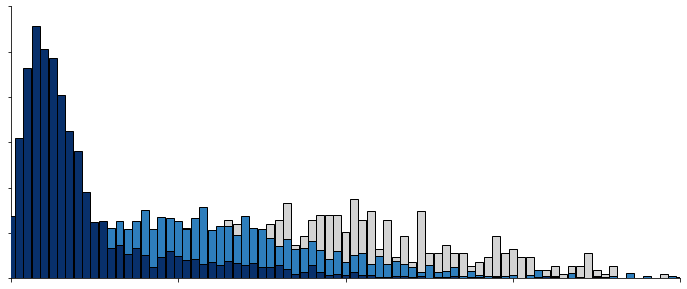

In [13]:
data362    = cells[cells.strain=='yTL362'].total
bins362    = scipy.bincount(data362)/len(data362)
x362       = scipy.arange(len(bins362))
fit362,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x362, ydata  = bins362, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data399    = cells[cells.strain=='yTL399'].total
bins399    = scipy.bincount(data399)/len(data399)
x399       = scipy.arange(len(bins399))
fit399,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x399, ydata  = bins399, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data400    = cells[cells.strain=='yTL400'].total
bins400    = scipy.bincount(data400)/len(data400)
x400       = scipy.arange(len(bins400))
fit400,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x400, ydata  = bins400, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data401    = cells[cells.strain=='yTL401'].total
bins401    = scipy.bincount(data401)/len(data401)
x401       = scipy.arange(len(bins401))
fit401,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x401, ydata  = bins401, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)
data402    = cells[cells.strain=='yTL402'].total
bins402    = scipy.bincount(data402)/len(data402)
x402       = scipy.arange(len(bins402))
fit402,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x402, ydata  = bins402, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)

# x    = scipy.arange(len(bins))
plt.figure(figsize=(12,5))
cmap = plt.get_cmap('Blues')
#plt.fill_between(x,pmRNA(x,*fit362),color='darkblue',alpha=0.5,zorder=1)
plt.bar(x362,bins362,color='lightgrey',width=0.95,edgecolor='black',zorder=2)

#plt.fill_between(x,pmRNA(x,*fit399),color=cmap(0.202),alpha=0.5)
#plt.fill_between(x,pmRNA(x,*fit400),color=cmap(0.44),alpha=0.5)
#plt.fill_between(x,pmRNA(x,*fit401),color=cmap(0.7),alpha=0.5,zorder=3)
plt.bar(x401,bins401,color=cmap(0.7),width=0.95,edgecolor='black',zorder=4)


#plt.fill_between(x,pmRNA(x,*fit402),color=cmap(1.0),alpha=0.5,zorder=5)
plt.bar(x402,bins402,color=cmap(1.0),width=0.95,edgecolor='black',zorder=6)

# plt.plot(x,pmRNA(x,*fit362),color='black',lw=4)
# plt.bar(x,bins362,color='darkblue',width=0.95)


plt.xlim([0,80])
plt.yticks(scipy.arange(0,0.13,0.02),[])
plt.xticks(scipy.arange(0,81,20),[])

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure3B.svg',format='svg',transparent=True)

#plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure3B.svg',format='svg',transparent=True)

# plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049))
# plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0),alpha=0.5)

[ 19155.06667461  21073.55602737 475237.75710483   6103.51333908]
[0.00329598 0.00362611 0.08177367 0.00105022]
switch  0.006922091376335725
on f 0.47615421894045873
epsilon 0.001050223000848402
37.0
8.759090817167735


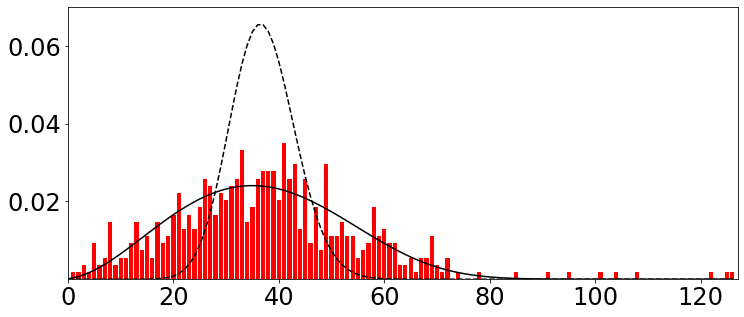

In [14]:
gamma     = scipy.special.gamma
F1        = scipy.special.hyp1f1
exp       = scipy.exp
factorial = scipy.special.factorial
#eq from raj et al 2006
pmRNA = lambda x,a,b,e,d: gamma(a / d + x) / gamma(x + 1) / gamma( a / d + b / d + x ) * gamma(a/d + b/d) / gamma(a/d) * (e/d) ** x * F1(a/d+x,a/d+b/d+x,-e/d)        
def pmRNA(m, a, b, e, d):
    #eq from sharezaei et al 2008 pnas swain
    l0,l1,ms = a/d , b/d, e/d
    p1 = ms**m * exp(-ms) / factorial(m)
    p2 = gamma(l0+m) * gamma(l0+l1) / gamma(l0+l1+m) / gamma(l0)
    p3 = F1(l1, l0+l1+m, ms)
    return(p1*p2*p3)




data = cells[cells.strain=='yTL362'].total
mu = scipy.median(data)
var = scipy.var(data)
bins = scipy.bincount(data)/len(data)
x    = scipy.arange(len(bins))
fit,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x, ydata  = bins, p0  = [1,1,1,1], bounds = [0,(100,100,100,100)], maxfev=1000)



plt.figure(figsize=(12,5))
plt.bar(x,bins,color='red')
plt.plot(pmRNA(x,*fit),color='black')#array([0.05021384, 0.05524325, 1.24581035, 0.016     ])
#plt.plot(pmRNA(x,*[0.05021384, 0.05524325, 1.24581035, 0.016     ]),color='gold')
#plt.axvline(mu, color='black')
#x = scipy.arange(scipy.stats.poisson.ppf(0.001, mu), scipy.stats.poisson.ppf(0.999, mu))
y = scipy.stats.poisson.pmf(x,mu)
plt.plot(x,y,color='black',linestyle='--')
plt.xlim([0,len(bins)])
plt.ylim([0.0001,0.07])
print(scipy.sqrt(scipy.diag(cov)))
print(fit / fit[-1] *  scipy.log(2)/660 )
parms = fit / fit[-1] *  scipy.log(2)/660
print("switch ",sum(parms[:2]))
print("on f",parms[0]/sum(parms[:2]))
print("epsilon",parms[3])

print(mu)
print(var/mu)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\WTFISH.svg',format='svg',transparent=True)

In [15]:
fano = lambda a,b,e,d:1+((e*b)/((a+b)*((a+b) + d)))
fano(*fit)
fano(*[0.05021384, 0.05524325, 1.24581035, 0.016     ])

6.373193742821584

In [16]:
plt.rcParams.update({'font.size': 22})

In [17]:

def findMode(track, bins=1000):
    kernal = scipy.stats.gaussian_kde(track)
    x      = scipy.arange(min(track),max(track),(max(track)-min(track))/bins)
    sample = kernal(x)
    argmax = x[scipy.argmax(sample)]
#     counts,edges = scipy.histogram(track [track < scipy.mean(track) + 2 * scipy.std(track) ]    ,bins=bins)
#     arg          = scipy.argmax(counts)
#     mode         = scipy.mean(edges[arg:arg+2])
    return(argmax)

pad = lambda x,length: scipy.pad(x,  [0, (length - len(x))  ],  mode='constant', constant_values=scipy.nan)

def moded(tracks):
    return([track - findMode(track) for track in tracks])
findMode(dots[(dots.strain==strain)&(dots.nuclear==0)].intensity)


20566.057583385686

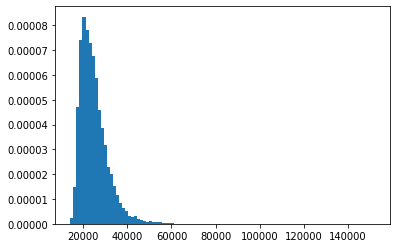

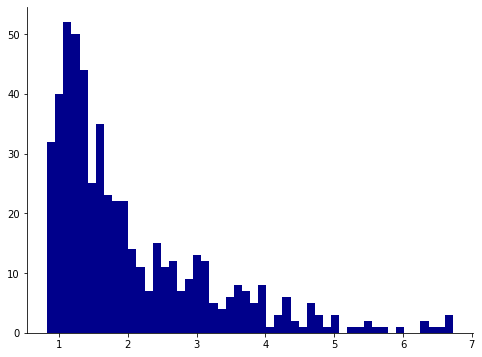

In [26]:
strain = 'yTL362'
plt.hist(dots[(dots.strain==strain)&(dots.nuclear==0)].intensity,bins=100,density=True)
tssintensity =scipy.array([x for x in cells[cells.strain==strain].tss_intensity if x>0])


plt.figure(figsize=(8,6))
x=plt.hist(tssintensity/20566,bins=50,color='darkblue')
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\FigureS3A.svg',format='svg',transparent=True)

#sum(cells[cells.strain==strain].tss_intensity>30000)/len(cells[cells.strain==strain].tss_intensity)

In [11]:
list(discritized)

[1.0,
 1.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 4.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 2.0,
 5.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 4.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 5.0,
 5.0,
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 4.0,
 2.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 4.0,
 1.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 5.0,
 1.0,
 2.0,
 6.0,
 1.0,
 2.0,
 4.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 4.0,
 1.0,
 6.0,
 3.0,
 1.0,
 1.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0

[3.92628089e+01 2.73865886e+00 1.68804911e+07 1.03536689e+07]
[1.16295710e-06 8.11185009e-08 1.63038784e+00 1.00000000e+00]
1.767097966728281
0.642943874275903


array([1.86073136e-08, 1.29789601e-09, 2.60862055e-02, 1.60000000e-02])

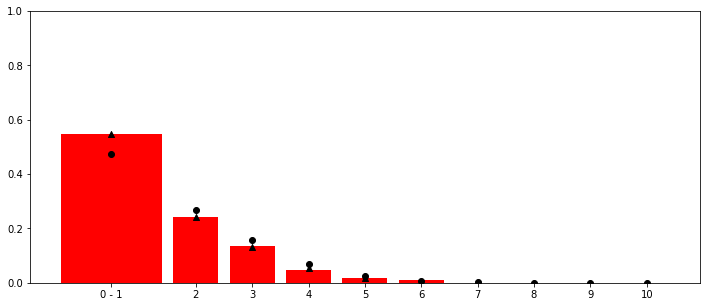

In [29]:
strain = 'yTL362'
singleTranscript = scipy.median(dots[(dots.strain==strain)&(dots.nuclear==0)].intensity)
data        = cells[cells.strain==strain].tss_intensity
discritized = scipy.around(data/singleTranscript)
mu          = scipy.mean(discritized)
var         = scipy.var(discritized)
freqs       = scipy.concatenate([scipy.bincount(discritized)/len(data), [0]*4])
x           = scipy.arange(len(freqs))
fit,cov = scipy.optimize.curve_fit(f = pmRNA, xdata  = x[2:], ydata  = freqs[2:], p0  = [1,1,1,1], bounds = [0,100], maxfev=1000)


plt.figure(figsize=(12,5))
plt.bar(x[2:], freqs[2:],color='red',zorder=-1)
plt.bar(0.5, scipy.sum(freqs[:2]),color='red',zorder=-1,width=1.8)
plt.scatter(x[2:], pmRNA(x[2:],*fit),color='black',marker='^')
plt.scatter(scipy.mean(x[:2]), scipy.sum(pmRNA(x[:2],*fit)),color='black',marker='^')
plt.xticks([0.5,2,3,4,5,6,7,8,9,10],['0 - 1']+[str(i) for i in range(2,11)])

y = scipy.stats.poisson.pmf(x,mu)
plt.scatter(x[2:],y[2:],color='black')
plt.scatter(scipy.mean(x[:2]),scipy.sum(y[:2]),color='black')
plt.ylim([0,1])
#plt.scatter(x[2:], pmRNA(x[2:],*(fit/fit[-1])),color='black')

print(scipy.sqrt(scipy.diag(cov)))
print(fit/fit[-1])
print(mu)
print(var/mu)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\WT_nascent_FISH.svg',format='svg',transparent=True)
fit/fit[-1]*0.016

In [8]:
sum(freqs[2:])

0.45286506469500926

<BarContainer object of 127 artists>

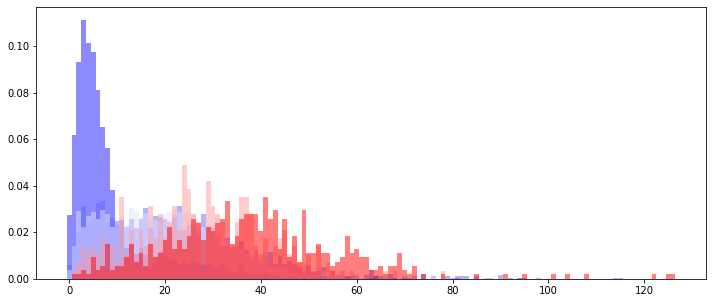

In [8]:
cmap = plt.get_cmap('bwr')

plt.figure(figsize=(12,5))
bins = scipy.bincount(cells[cells.strain=='yTL402'].total)
plt.bar(range(len(bins)),bins/sum(bins),width=1,color=cmap(0.049),alpha=0.5)
bins = scipy.bincount(cells[cells.strain=='yTL401'].total)
plt.bar(range(len(bins)),bins/sum(bins),width=1,color=cmap(0.202),alpha=0.5)
bins = scipy.bincount(cells[cells.strain=='yTL400'].total)
plt.bar(range(len(bins)),bins/sum(bins),width=1,color=cmap(0.44),alpha=0.5)
bins = scipy.bincount(cells[cells.strain=='yTL399'].total)
plt.bar(range(len(bins)),bins/sum(bins),width=1,color=cmap(0.7),alpha=0.5)
bins = scipy.bincount(cells[cells.strain=='yTL362'].total)
plt.bar(range(len(bins)),bins/sum(bins),width=1,color=cmap(1.0),alpha=0.5)






In [29]:
def kernal(data,bins=1000):
    kernal = scipy.stats.gaussian_kde(data)
    x      = scipy.arange(min(data),max(data),(max(data)-min(data))/bins)
    sample = kernal(x)
    return(x,sample)

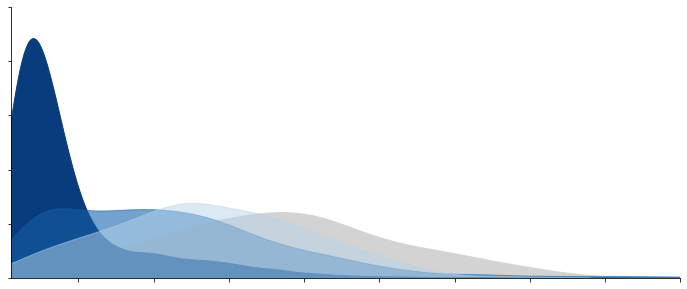

In [44]:
# x = scipy.arange(120)
# cmap = plt.get_cmap('bwr')
# plt.plot(x,pmRNA(x,*[ 3.13831848,  3.45256972, 77.86211571,  1.        ]), color=cmap(1.0))
# plt.plot(x,pmRNA(x,*[ 2.02985738,  1.83617668, 51.99665304,  1.        ]),color=cmap(0.7))
# plt.plot(x,pmRNA(x,*[ 1.34222039,  1.58062104, 43.39783728,  1.        ]),color=cmap(0.44))
# plt.plot(x,pmRNA(x,*[ 1.40374572,  2.55524727, 60.26883326,  1.        ]),color=cmap(0.202))
# plt.plot(x,pmRNA(x,*[  2.6857229, 70.99988924, 167.0622674,  1.        ]),color=cmap(0.049))

cmap = plt.get_cmap('Blues')
plt.figure(figsize=(12,5))
# plt.plot(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0))
# plt.plot(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7))
# plt.plot(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44))
# plt.plot(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202))
# plt.plot(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049))

#plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049))
plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202))
#plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44))
# plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7))
# plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0))


plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color='lightgrey')
plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(1-0.049))
plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(1-0.202),alpha=0.5)
#plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(1-0.44),alpha=0.5)
plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(1-0.7),alpha=0.5)

# plt.fill_between(*kernal(cells[cells.strain=='yTL362'].total),color=cmap(1.0),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL399'].total),color=cmap(0.7),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL400'].total),color=cmap(0.44),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL401'].total),color=cmap(0.202),alpha=0.5)
# plt.fill_between(*kernal(cells[cells.strain=='yTL402'].total),color=cmap(0.049),alpha=0.5)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim([0,0.10])
plt.xlim([1,90])
plt.xticks(scipy.arange(10,91,10),[])
plt.yticks(scipy.arange(0.0,0.11,0.02),[])

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\tmp_figures\fishDensityActmutants.svg',format='svg',transparent=True)

#bins = scipy.bincount(data)/len(data)


<BarContainer object of 11 artists>

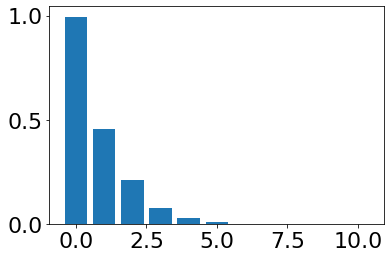

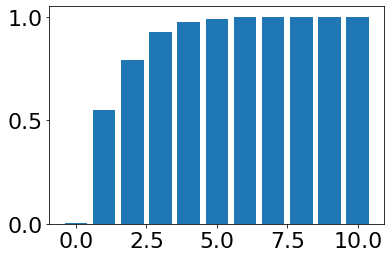

In [13]:
bins = freqs
plt.bar(scipy.arange(len(bins)), 1- scipy.cumsum(bins)/sum(bins))
plt.figure()
plt.bar(scipy.arange(len(bins)),  scipy.cumsum(bins)/sum(bins)  )

ValueError: No objects to concatenate

In [192]:
scipy.mean(cells[cells.strain=='yTL362'].total),scipy.mean(cells[cells.strain=='yTL399'].total),scipy.mean(cells[cells.strain=='yTL400'].total),scipy.mean(cells[cells.strain=='yTL401'].total),scipy.mean(cells[cells.strain=='yTL402'].total)


(37.59149722735675,
 27.566433566433567,
 20.649658497388508,
 22.507317073170732,
 9.025660096690219)

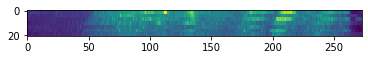

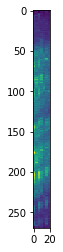

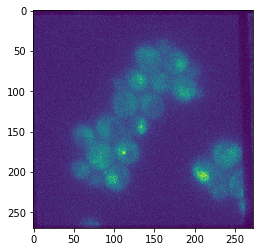

In [18]:
import sys 
sys.path.insert(0, "G:\\My Drive\\src\\GeneRing\\src")
import Chromatin
import Molecules
import Pho5
import scipy
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
## This File Contains all kinds of example analysis for looking
## at groups of Molecules using the Chromatin Package. Check it out woot.
PATH_TO_DATABASE = r'D:\genering'
base             = Molecules.DataBase(PATH_TO_DATABASE)

ym19   = base._mols[base._strain=='yM19']
ym8    = base._mols[base._strain=='yM8']
yc169  = base._mols[base._strain=='yC169']
ym208  = base._mols[base._strain=='yM208']
ym2    = base._mols[base._strain=='yM2']
ym89   = base._mols[base._strain=='yM89']
isw    = base._mols[base._strain=='yM196']
ghy2625= base._mols[base._strain=='GHY2625'  ]
ghy2630= base._mols[base._strain=='GHY2630'  ]

Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 length.Invalid Molecule(s) Included In Analysis.Regions Maintain 0 le

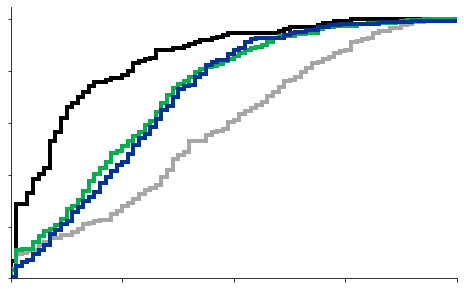

In [59]:
### ANALYSIS FEROM 2021/11/19 I am making final figures for H. 

def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])

def occupancy(regions, length):
    array   = scipy.zeros(length)
    for reg in regions:
        array[reg.start:reg.end] += 1
    return (array.astype(int))
    
def analyze(mols):    
    mols    = [Chromatin.Molecule.filter(mol, lambda reg: reg.isbubble==1 and len(reg)<70) for mol in mols]
    ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
    tmols   = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])
    return ([len(reg) for reg in tmols ])
    

plt.figure(figsize=(8,5))

plt.hist( analyze(ym2) ,density=True    , bins=100,range=(0,1000), cumulative=True,  histtype='step'   ,lw=4, color = 'black' ,)    
 
plt.hist( analyze(ym8)  ,density=True   , bins=100,range=(0,1000),  cumulative=True, histtype='step'  ,lw=4, color = '#a6a6a6')  

plt.hist( analyze(ym208)  ,density=True , bins=100,range=(0,1000),  cumulative=True, histtype='step' ,lw=4, color = '#00b050')  

plt.hist( analyze(ym89)  ,density=True  ,bins=100,range=(0,1000),  cumulative=True, histtype='step'  ,lw=4, color = '#003297')  
# plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze(ym2  )   ,lw=4, color = 'black')#Repressed
# plt.plot(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym8 )   ,lw=4, color = '#a6a6a6',linestyle='--')##active
# plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym208 ) ,lw=4, color = '#00b050')##chd1
# plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym89)   ,lw=4, color = '#003297')#PHO4 Mutant

# for i,reg in enumerate(tmols):
#     plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='darkgrey',lw=2 )
#     #plt.plot([0,len(reg)],[i,i],color='darkblue' )

# start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
# end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
# plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
# plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

# plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
# plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
# plt.axvline(0,color='black',linestyle='--')
# plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
# plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.yticks([len(tmols)],[])
# plt.xticks(scipy.arange(-600,400,200),scipy.arange(-600,400,200))
plt.yticks(numpy.arange(0,1.1,0.2),[])
plt.xlim([0,800])
plt.xticks(scipy.arange(0,801,200),[])
plt.ylim(bottom = 0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
# ax.set_frame_on(False)
# xmin, xmax = ax.get_xaxis().get_view_interval()
# ymin, ymax = ax.get_yaxis().get_view_interval()
# ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Linker_length_cumden_20211911_textless.svg',format='svg',transparent=True)


In [47]:
import numpy

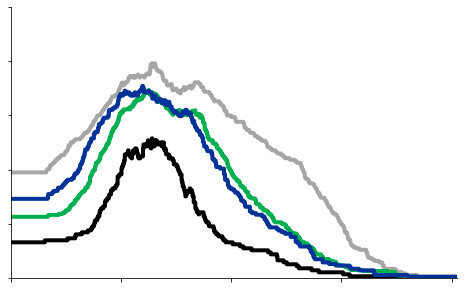

In [55]:
### ANALYSIS FEROM 2021/11/19 I am making final figures for H. 

def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])

def occupancy(regions, length):
    array   = scipy.zeros(length)
    for reg in regions:
        array[reg.start:reg.end] += 1
    return (array.astype(int))
    
def analyze(mols):    
    mols    = [Chromatin.Molecule.filter(mol, lambda reg: reg.isbubble==1 and len(reg)<70) for mol in mols]
    ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
    tmols   = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])
    return (occupancy(tmols, len(mols[0]))/len(tmols  ))
    

plt.figure(figsize=(8,5))

# plt.hist( analyze(ym2) ,density=True   ,histtype='step'   , color = 'black' ,)    

# plt.hist( analyze(ym8)  ,density=True   ,histtype='step'  , color = '#a6a6a6')  

# plt.hist( analyze(ym208)  ,density=True  ,histtype='step' , color = '#00b050')  

# plt.hist( analyze(ym89)  ,density=True  ,histtype='step'  , color = '#003297')  
mols = ym2
plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze(ym2  )   ,lw=4, color = 'black')#Repressed
plt.plot(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym8 )   ,lw=4, color = '#a6a6a6')##active
plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym208 ) ,lw=4, color = '#00b050')##chd1
plt.step(numpy.arange(len(mols[0]))-Pho5.TSS, analyze( ym89)   ,lw=4, color = '#003297')#PHO4 Mutant

# for i,reg in enumerate(tmols):
#     plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='darkgrey',lw=2 )
#     #plt.plot([0,len(reg)],[i,i],color='darkblue' )

# start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
# end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
# plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
# plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

# plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
# plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
# plt.axvline(0,color='black',linestyle='--')
# plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
# plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.yticks([len(tmols)],[])

plt.xlim([-600,210])
plt.ylim(bottom = 0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
# ax.set_frame_on(False)
# xmin, xmax = ax.get_xaxis().get_view_interval()
# ymin, ymax = ax.get_yaxis().get_view_interval()
# ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Linker_dnesity_20211911_textless.svg',format='svg',transparent=True)


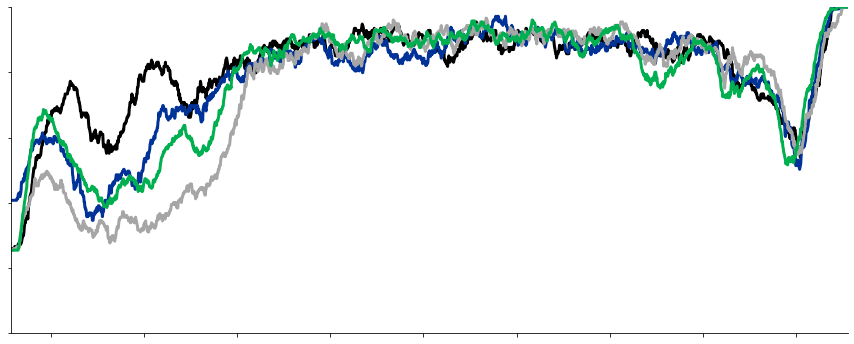

In [60]:
import Pho5
import matplotlib
fig = plt.figure(figsize=(15,6))
ax = plt.gca()
params = {"linewidth":3}


ax.plot(Pho5.POSITIONS,Molecules.rvalue(ym2)    ,  color = 'black',**params)
ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym89)  , color = '#003297',**params)
ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym8 )  , color = '#a6a6a6',**params )
ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym208 ), color = '#00b050',**params )


plt.ylim([0,1])
plt.xlim([-607,1638])
plt.xticks(scipy.arange(-500,1501,250),[])
plt.yticks(scipy.arange(0.0,1.1,0.2),["{:1.1f}".format(x) for x in scipy.arange(0.0,1.1,0.2)])
ax = plt.gca()

plt.yticks(numpy.arange(0,1.1,0.2),[])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\r_value_across_gene_20211119_textless.svg',format='svg',transparent=True)

In [3]:
ym19[0]

In [6]:
arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]

In [102]:
arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89
            ]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_uas1(mol) for mol in mols]
ndrs      = list(filter(lambda x:x,ndrs))

start_pos = scipy.array([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.array([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
##locations of medians from uasq # 55,0 ## 162,168 ## 131, 55 ## (mut76, wt107, mut55, wt168) delta repressed distance to uas1


In [103]:
scipy.median( scipy.amin (scipy.array(list(zip(Pho5.UAS1[0] - end_pos, start_pos - Pho5.UAS1[1]))),axis=1 ).clip(0) )
##closest nuc to uas1
#actmut 50
#actumut 21
#actmut 101

20.0

In [106]:
scipy.median(list(map(len,ndrs))) #76#321 321/76
321/223

1.4394618834080717

In [45]:
[ndr.end+1 for ndr,mol in zip(ndrs,mols)]

[286,
 319,
 271,
 287,
 377,
 282,
 411,
 338,
 345,
 368,
 424,
 567,
 340,
 392,
 269,
 264,
 273,
 554,
 278,
 623,
 324,
 225,
 360,
 278,
 222,
 315,
 224,
 398,
 340,
 385,
 343,
 320,
 325,
 349,
 267,
 363,
 304,
 286,
 325,
 430,
 509,
 222,
 268,
 376,
 275,
 256,
 322,
 314,
 239,
 237,
 527,
 260,
 273,
 330,
 338,
 340,
 246,
 318,
 320,
 271,
 226,
 267,
 251,
 227,
 740,
 304,
 381,
 292,
 309,
 611,
 318,
 480,
 295,
 282,
 297,
 213,
 240,
 290,
 222,
 311,
 492,
 237,
 236,
 286,
 302,
 271,
 346,
 367,
 475,
 445,
 492,
 531,
 258,
 394,
 265,
 337,
 343,
 323,
 207,
 232,
 318,
 358,
 251,
 297,
 503,
 334,
 256,
 231,
 276,
 378,
 312,
 350,
 262,
 282,
 287,
 361,
 308,
 266,
 297,
 265,
 491,
 290,
 274,
 289,
 226,
 285,
 244,
 259,
 252,
 267,
 284,
 358,
 300,
 295,
 238,
 343]

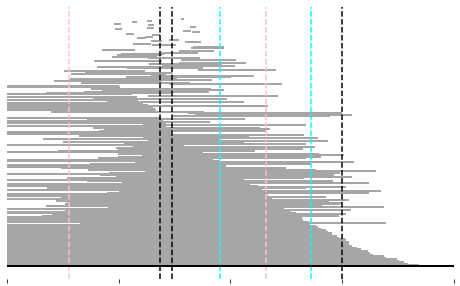

In [33]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='#a6a6a6',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.xlim([-600,200])

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure__4.svg',format='svg',transparent=True)


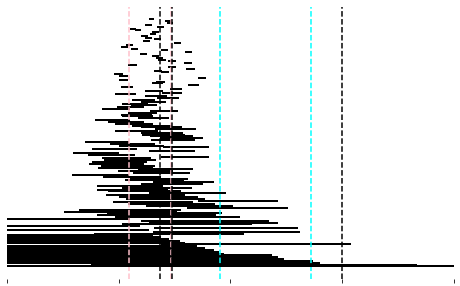

In [34]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='black',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.xlim([-600,200])

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure__3.svg',format='svg',transparent=True)


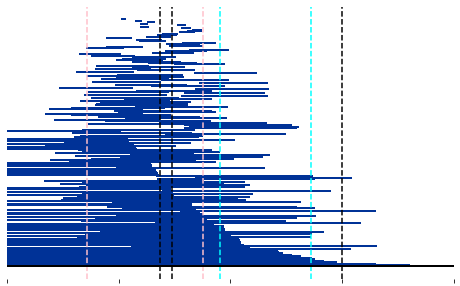

In [29]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='#003297',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.xlim([-600,200])

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure__1.svg',format='svg',transparent=True)


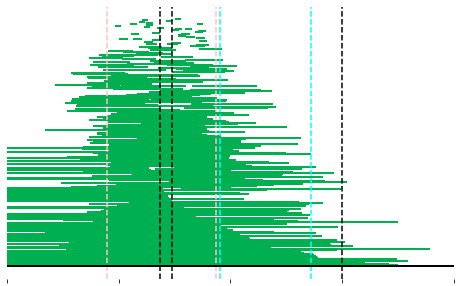

In [28]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='#00b050',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
plt.xlim([-600,200])
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure__2.svg',format='svg',transparent=True)


In [ ]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='darkgrey',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6B.svg',format='svg',transparent=True)


In [73]:
import numpy
mol    = ym2[0]._array_
breaks = numpy.pad( numpy.argwhere(numpy.ediff1d(mol)).flatten(), (1,1), mode='constant', constant_values = (0,len(mol)))
breaks[:-1]


#def array_to_molecule(array):


array([   0,  171,  444,  481,  768,  779,  841,  856,  976,  989, 1151,
       1161, 1258, 1272, 1473, 1497, 1593, 1655, 1763, 1776, 1935, 1945,
       2157, 2173], dtype=int64)

In [74]:
plt.plot(ym2[0]._array_)
plt.plot(

SyntaxError: unexpected EOF while parsing (<ipython-input-74-3f275322ae40>, line 2)

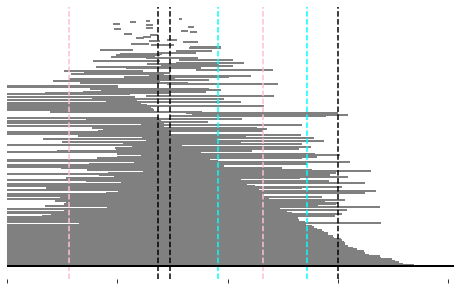

In [78]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='grey',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6C.svg',format='svg',transparent=True)


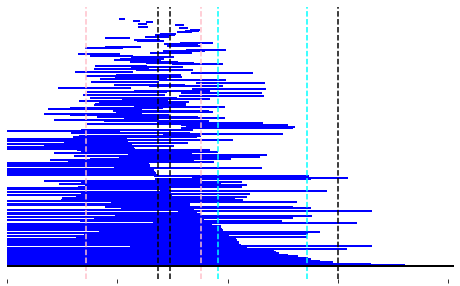

In [77]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[0]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-len(x)])#,-x.start,-x.end])


plt.figure(figsize=(8,5))
for i,reg in enumerate(tmols):
    plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='blue',lw=2 )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

start_pos = scipy.median([ndr.end+1 for ndr,mol in zip(ndrs,mols)])
end_pos   = scipy.median([ndr.start for ndr,mol in zip(ndrs,mols) if ndr])
plt.axvline(start_pos-Pho5.TSS,color='pink',linestyle='--')
plt.axvline(end_pos  -Pho5.TSS,color='pink',linestyle='--')

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(plt.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6D.svg',format='svg',transparent=True)


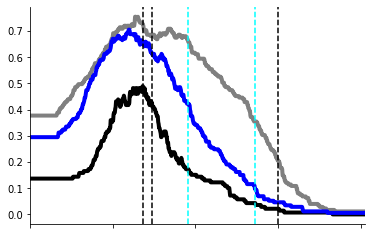

In [80]:
def get_ndr(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS1[1]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols if get_ndr(mol)]
tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:x.end)#,-x.start,-x.end])

y = scipy.array([0]*Pho5.LENGTH)
for reg in ndrs:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(ndrs), color = 'black',linewidth=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols if get_ndr(mol)]
tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:x.end)#,-x.start,-x.end])

y = scipy.array([0]*Pho5.LENGTH)
for reg in ndrs:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(ndrs), color = 'grey',linewidth=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols if get_ndr(mol)]
tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:x.end)#,-x.start,-x.end])

y = scipy.array([0]*Pho5.LENGTH)
for reg in ndrs:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(ndrs), color = 'blue',linewidth=4)

# plt.figure(figsize=(8,5))
# for i,reg in enumerate(tmols):
#     plt.plot([reg.start - Pho5.TSS, reg.end-Pho5.TSS],[i*1.5,i*1.5],color='darkgrey',lw=2 )
#     #plt.plot([0,len(reg)],[i,i],color='darkblue' )

plt.axvline(Pho5.UAS1[0]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(Pho5.UAS1[1]-Pho5.TSS,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.axvline(Pho5.UAS2[0]-Pho5.TSS,color='cyan',linestyle='--')
plt.axvline(Pho5.TATA[0]-Pho5.TSS,color='cyan',linestyle='--')


# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
#plt.yticks([len(tmols)],[])
plt.xticks(scipy.arange(-600,400,200),[])
plt.xlim([-600,210])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



(256, 754)

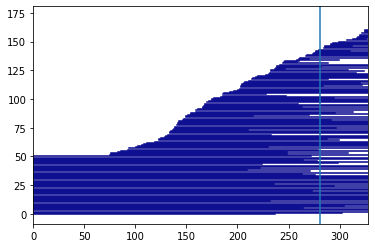

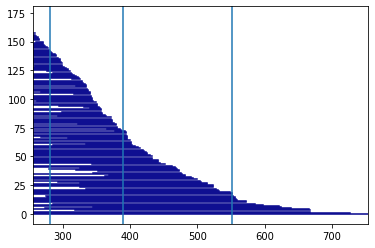

In [81]:
tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[x.start])

for i,reg in enumerate(tmols):
    plt.plot([reg.start,reg.end],[i,i],color='darkblue' )
plt.axvline(Pho5.UAS1[0])
plt.axvline(Pho5.UAS2[0])
plt.axvline(Pho5.TATA[0])
plt.xlim([0,Pho5.UAS1[1]+25])

tmols = sorted(filter(lambda x: x is not None, ndrs), key=lambda x:[-x.end])
plt.figure()
for i,reg in enumerate(tmols):
    plt.plot([reg.start,reg.end],[i,i],color='darkblue' )
    #plt.plot([0,len(reg)],[i,i],color='darkblue' )

plt.axvline(Pho5.UAS1[0])
plt.axvline(Pho5.UAS2[0])
plt.axvline(Pho5.TATA[0])
plt.xlim([Pho5.UAS1[0]-25,Pho5.TSS+147])


In [20]:
def array_to_molecule(array):
    edges = scipy.unique(scipy.append(scipy.insert(scipy.where(scipy.diff(array))[0],0,0),len(array)))
    return(Chromatin.Molecule([Chromatin.Region( array[start+1], start+1, stop, stop-start-1) for start,stop in zip(edges[:-1],edges[1:])]))

def get_ndr(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1)))

    #potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0]-75,Pho5.UAS2[1]+75)))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    #potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1)))
    #if not potentials:
    #potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(0,Pho5.TSS)))
    #if potentials:
    #    return(sorted(potentials,key=len)[-1])


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols if get_ndr(mol)]
nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

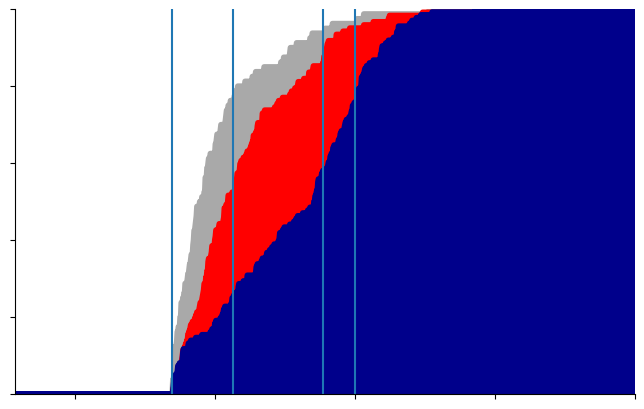

In [102]:
plt.figure(figsize=(8,5))

arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
start_pos = [mol[ndr.end+1].start for ndr,mol in zip(ndrs,mols) if ndr]
y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
plt.fill_between(Pho5.POSITIONS,y/len(start_pos), color = 'darkgrey',lw=4)



arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
start_pos = [mol[ndr.end+1].start for ndr,mol in zip(ndrs,mols) if ndr]
y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
plt.fill_between(Pho5.POSITIONS,y/len(start_pos), color = 'red',lw=4)


arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
start_pos = [mol[ndr.end+1].start for ndr,mol in zip(ndrs,mols) if ndr]
y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
plt.fill_between(Pho5.POSITIONS,y/len(start_pos), color = 'darkblue',lw=4)


# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
#plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue',lw=4)





plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-Pho5.TSS,500])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6C_3A.svg',format='svg',transparent=True)


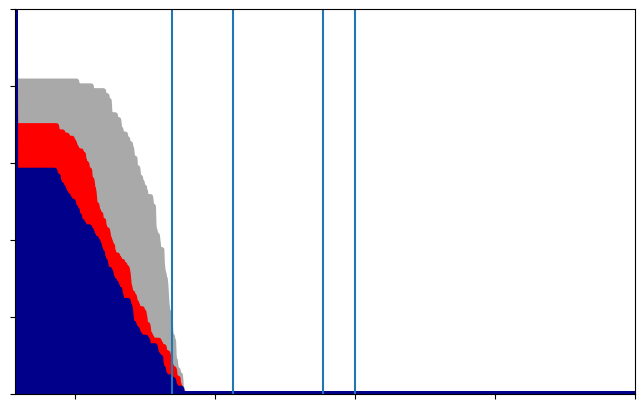

In [103]:
plt.figure(figsize=(8,5))

arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
end_pos   = [mol[ndr.start-1].end if mol[ndr.start-1].isbubble else 0  for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.cumsum(scipy.bincount(end_pos,minlength=Pho5.LENGTH)[::-1])[::-1]
plt.fill_between(Pho5.POSITIONS,y/y[0], color = 'darkgrey',lw=4)


arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
end_pos   = [mol[ndr.start-1].end if mol[ndr.start-1].isbubble else 0  for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.cumsum(scipy.bincount(end_pos,minlength=Pho5.LENGTH)[::-1])[::-1]
#y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
plt.fill_between(Pho5.POSITIONS,y/y[0], color = 'red',lw=4)

arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols      = [array_to_molecule(array) for array in arrays]
ndrs      = [get_ndr(mol) for mol in mols]
end_pos   = [mol[ndr.start-1].end if mol[ndr.start-1].isbubble else 0  for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.cumsum(scipy.bincount(end_pos,minlength=Pho5.LENGTH)[::-1])[::-1]
#y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
plt.fill_between(Pho5.POSITIONS,y/y[0], color = 'darkblue',lw=4)


# arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
# mols      = [array_to_molecule(array) for array in arrays]
# ndrs      = [get_ndr(mol) for mol in mols]
# start_pos = [mol[ndr.end+1].start for ndr,mol in zip(ndrs,mols) if ndr]
# y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
# plt.fill_between(Pho5.POSITIONS,y/len(start_pos), color = 'red',lw=4)


# arrays    = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
# mols      = [array_to_molecule(array) for array in arrays]
# ndrs      = [get_ndr(mol) for mol in mols]
# start_pos = [mol[ndr.end+1].start for ndr,mol in zip(ndrs,mols) if ndr]
# y         = scipy.cumsum(scipy.bincount(start_pos,minlength=Pho5.LENGTH))
# plt.fill_between(Pho5.POSITIONS,y/len(start_pos), color = 'darkblue',lw=4)


# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
#plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue',lw=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-Pho5.TSS,500])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6C_3B.svg',format='svg',transparent=True)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)


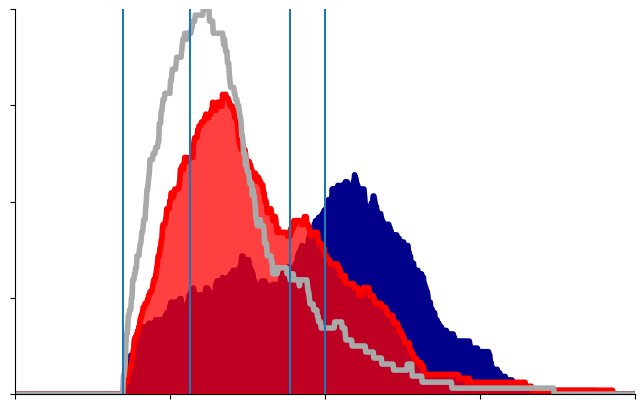

In [104]:
def get_nuc1(ndr,mol):
    nuc = mol[ndr.end+1]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)


plt.figure(figsize=(8,5))
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]



y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'darkgrey',linewidth=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-500,500])
plt.ylim([0,0.8])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6F.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

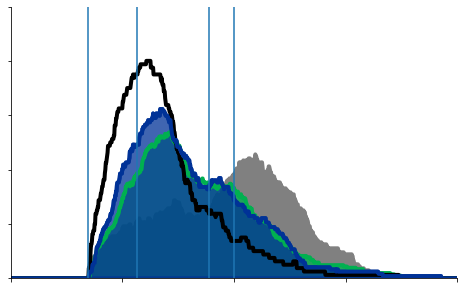

In [51]:
def get_nuc1(ndr,mol):
    nuc = mol[ndr.end+1]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)


plt.figure(figsize=(8,5))
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]



y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',lw=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'black',linewidth=4)



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',linewidth=4,alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',lw=4)




plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-500,500])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\more.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

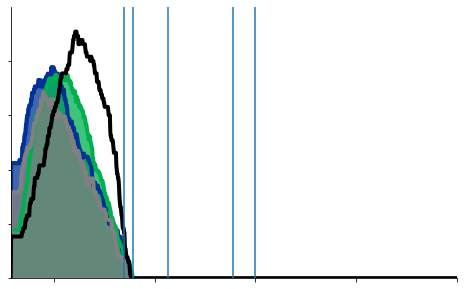

In [50]:
plt.figure(figsize=(8,5))


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',linewidth=4,alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',lw=4)




arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',lw=4)




arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4,alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'black',linewidth=4)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)
# plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]
# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'darkgrey',linewidth=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS1[1]-Pho5.TSS)

plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-Pho5.TSS,500])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\more_2.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

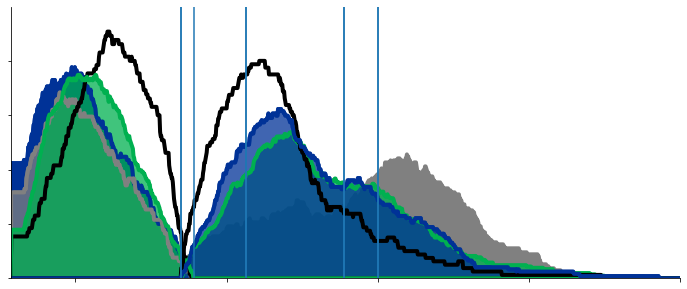

In [49]:
plt.figure(figsize=(12,5))


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',linewidth=4)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',lw=4)




arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4,alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'black',linewidth=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.start-1] for ndr,mol in zip(ndrs,mols) if ndr and mol[ndr.start-1].isbubble]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',lw=4)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)
# plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]
# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'darkgrey',linewidth=4)
def get_nuc1(ndr,mol):
    nuc = mol[ndr.end+1]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]



y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#00b050',lw=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'black',linewidth=4)



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',linewidth=4,alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = '#003297',lw=4)




plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-500,500])
plt.ylim([0,0.8])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS1[1]-Pho5.TSS)

plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-Pho5.TSS,500])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\both.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

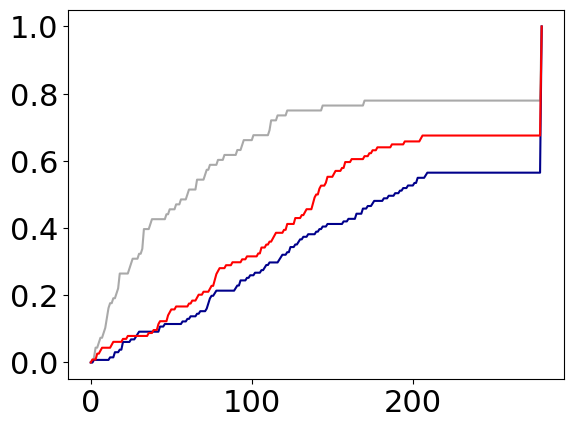

In [100]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS1[0])))
    if potentials:
        return(sorted(potentials,key=len)[-1])

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(starts))/sum(scipy.bincount(starts))     ,color='darkgrey')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(starts))/sum(scipy.bincount(starts))       ,color='darkblue')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(starts))/sum(scipy.bincount(starts))       ,color='red')

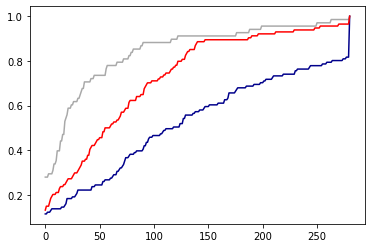

In [818]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS1[0])))
    if potentials:
        return(sorted(potentials,key=len)[-1])

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(mindist))/sum(scipy.bincount(mindist))     ,color='darkgrey')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(mindist))/sum(scipy.bincount(mindist))       ,color='darkblue')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]
plt.plot(scipy.cumsum(scipy.bincount(mindist))/sum(scipy.bincount(mindist))       ,color='red')

In [809]:
ndrs[0].end - Pho5.UAS1[1]

129

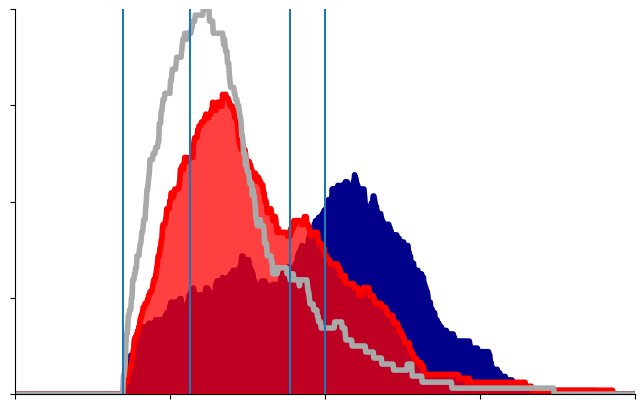

In [108]:
def get_nuc1(ndr,mol):
    nuc = mol[ndr.end+1]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)


plt.figure(figsize=(8,5))
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]



y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'darkgrey',linewidth=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-500,500])
plt.ylim([0,0.8])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure555.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

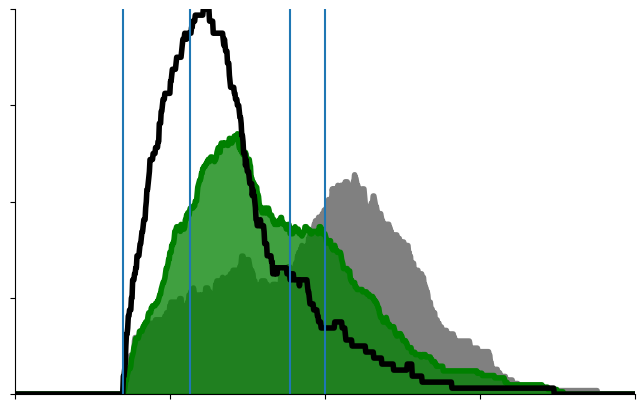

In [116]:
def get_nuc1(ndr,mol):
    nuc = mol[ndr.end+1]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)


plt.figure(figsize=(8,5))
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]



y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey',lw=4)


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]

y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'green',alpha=0.75)
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'green',lw=4)

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [get_nuc1(ndr,mol) for ndr,mol in zip(ndrs,mols) if ndr]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'black',linewidth=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-500,500])
plt.ylim([0,0.8])
plt.yticks(scipy.arange(0,0.81,0.2),[])
plt.xticks(scipy.arange(-500,501,250),[])
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure555.svg',format='svg',transparent=True)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

<BarContainer object of 1 artists>

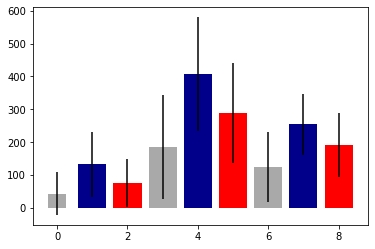

In [811]:
def get_uas1(mol):
    potentials = list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS1[0])))
    if potentials:
        return(sorted(potentials,key=len)[-1])
    
width = 2/4    

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [ndr.end - ndr.start for ndr in ndrs]


plt.bar( 0, scipy.mean(mindist),width = width,yerr=[scipy.var(mindist)**(0.5)],color='darkgrey'    )
#,yerr=yerr102,width=width,align='edge',color='darkblue',edgecolor='white',error_kw=dict(ecolor='black', lw=2))
plt.bar( 3, scipy.mean(lengths),yerr=[scipy.var(lengths)**(0.5)],color='darkgrey'    )
plt.bar( 6, scipy.mean(maxdist),yerr=[scipy.var(maxdist)**(0.5)],color='darkgrey'    )

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]

lengths = [len(ndr) for ndr in ndrs]

plt.bar( 1, scipy.mean(mindist),yerr=[scipy.var(mindist)**(0.5)],color='darkblue'    )
plt.bar( 4, scipy.mean(lengths),yerr=[scipy.var(lengths)**(0.5)],color='darkblue'    )
plt.bar( 7, scipy.mean(maxdist),yerr=[scipy.var(maxdist)**(0.5)],color='darkblue'    )


arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_uas1(mol) for mol in mols if get_uas1(mol)]
ends    = [ ndr.end - Pho5.UAS1[1]   for ndr in ndrs]
starts  = [Pho5.UAS1[0] - ndr.start  for ndr in ndrs]
mindist = [min( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
maxdist = [max( max(start,0),max(end,0)  ) for start, end in zip(starts,ends)]
lengths = [len(ndr) for ndr in ndrs]

plt.bar( 2, scipy.mean(mindist),yerr=[scipy.var(mindist)**(0.5)]   ,color='red' )
plt.bar( 5, scipy.mean(lengths),yerr=[scipy.var(lengths)**(0.5)],color='red'    )
plt.bar( 8, scipy.mean(maxdist),yerr=[scipy.var(maxdist)**(0.5)],color='red'    )



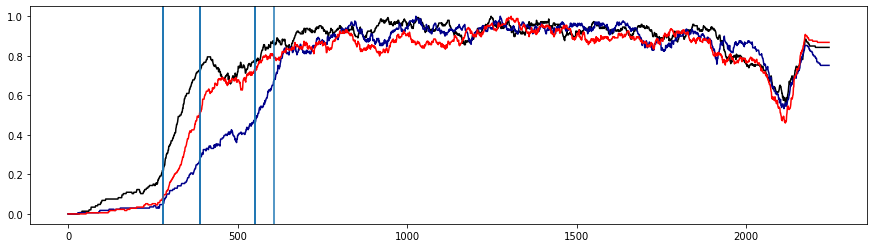

In [424]:
plt.figure(figsize=(15,4))

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.end+1:] for ndr,mol in zip(ndrs,mols)]
y = scipy.array([0]*Pho5.LENGTH)
for mol in nuc_1:
    for reg in mol:
        if reg.isbubble:
            y[reg.start:reg.end] +=1
plt.plot(y/max(y), color = 'black')
plt.axvline(Pho5.UAS1[0])
plt.axvline(Pho5.UAS2[0])
plt.axvline(Pho5.TATA[0])

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.end+1:] for ndr,mol in zip(ndrs,mols)]

y = scipy.array([0]*Pho5.LENGTH)
for mol in nuc_1:
    for reg in mol:
        if reg.isbubble:
            y[reg.start:reg.end] +=1
plt.plot(y/max(y), color = 'darkblue')
plt.axvline(Pho5.UAS1[0])
plt.axvline(Pho5.UAS2[0])
plt.axvline(Pho5.TATA[0])

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [mol[ndr.end+1:] for ndr,mol in zip(ndrs,mols)]

y = scipy.array([0]*Pho5.LENGTH)
for mol in nuc_1:
    for reg in mol:
        if reg.isbubble:
            y[reg.start:reg.end] +=1
plt.plot(y/max(y), color = 'red')
plt.axvline(Pho5.UAS1[0])
plt.axvline(Pho5.UAS2[0])
plt.axvline(Pho5.TATA[0])
plt.axvline(Pho5.TSS)

# arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
# mols    = [array_to_molecule(array) for array in arrays]
# ndrs    = [get_ndr(mol) for mol in mols]
# nuc_1   = [mol[ndr.end+1] for ndr,mol in zip(ndrs,mols)]

# y = scipy.array([0]*Pho5.LENGTH)
# for reg in nuc_1:
#     y[reg.start:reg.end] +=1
# plt.plot(y/max(y), color = 'orange')
# plt.axvline(Pho5.UAS1[0])
# plt.axvline(Pho5.UAS2[0])
# plt.axvline(Pho5.TATA[0])
# plt.axvline(Pho5.TSS)

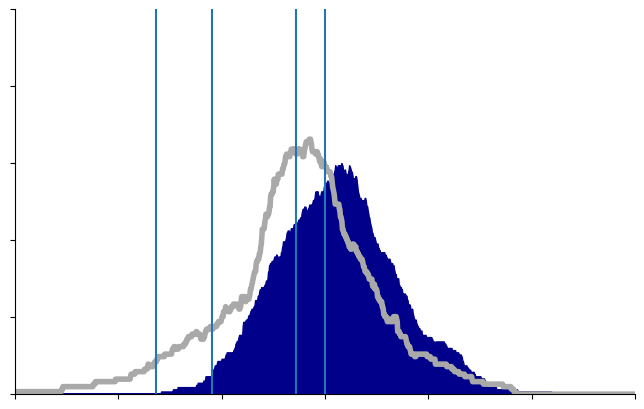

In [109]:
def get_1_nuc(mol):
    nucs = [reg for reg in mol[Pho5.TSS-147//2:] if reg.isbubble]
    nuc = [nuc for nuc in nucs][0]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)

plt.figure(figsize=(8,5))



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
    
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

# plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)
# plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)

 
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS, y /len(nuc_1), color = 'darkgrey',lw=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-600,600])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-600,601,200),[])
ax = plt.gca()

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6666G.svg',format='svg',transparent=True)


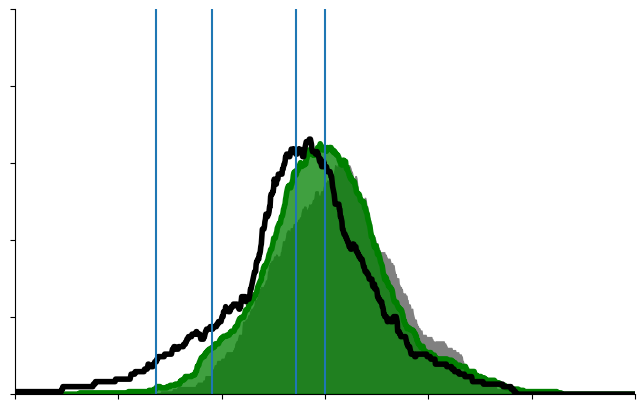

In [117]:
def get_1_nuc(mol):
    nucs = [reg for reg in mol[Pho5.TSS-147//2:] if reg.isbubble]
    nuc = [nuc for nuc in nucs][0]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)

plt.figure(figsize=(8,5))



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
    
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'grey')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym208]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'green',lw=4)
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'green',alpha=0.75)

 
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS, y /len(nuc_1), color = 'black',lw=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-600,600])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-600,601,200),[])
ax = plt.gca()

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure_Boeger_20211119\Figure6666G.svg',format='svg',transparent=True)


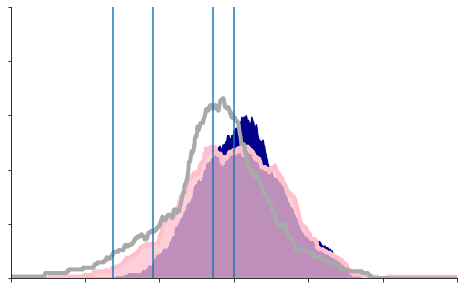

In [7]:
def get_1_nuc(mol):
    nucs = [reg for reg in mol[Pho5.TSS-147//2:] if reg.isbubble]
    nuc = [nuc for nuc in nucs][0]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)

plt.figure(figsize=(8,5))



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
    
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym19]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'pink',lw=4)
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'pink',alpha=0.75)

 
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS, y /len(nuc_1), color = 'darkgrey',lw=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-600,600])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-600,601,200),[])
ax = plt.gca()

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6G.svg',format='svg',transparent=True)


In [ ]:
def get_1_nuc(mol):
    nucs = [reg for reg in mol[Pho5.TSS-147//2:] if reg.isbubble]
    nuc = [nuc for nuc in nucs][0]
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    if len(nuc) > 147*2:
        nuc = Chromatin.Region(start=nuc.start,end=nuc.start+len(nuc)//2,size=len(nuc)//2,bubble=True)
    return(nuc)

plt.figure(figsize=(8,5))



arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym8]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
    
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'darkblue')

arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym89]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1

plt.plot(Pho5.POSITIONS,y/len(nuc_1), color = 'red',lw=4)
plt.fill_between(Pho5.POSITIONS,y/len(nuc_1), color = 'red',alpha=0.75)

 
arrays  = [Chromatin.Molecule.array(filter(lambda reg: reg.isbubble==1 and len(reg)>70, mol), Pho5.LENGTH) for mol in ym2]
mols    = [array_to_molecule(array) for array in arrays]
ndrs    = [get_ndr(mol) for mol in mols]
nuc_1   = [ get_1_nuc(mol) for mol in mols]
y = scipy.array([0]*Pho5.LENGTH)
for reg in nuc_1:
    y[reg.start:reg.end] +=1
plt.plot(Pho5.POSITIONS, y /len(nuc_1), color = 'darkgrey',lw=4)


plt.axvline(Pho5.UAS1[0]-Pho5.TSS)
plt.axvline(Pho5.UAS2[0]-Pho5.TSS)
plt.axvline(Pho5.TATA[0]-Pho5.TSS)
plt.axvline(Pho5.TSS-Pho5.TSS)
plt.xlim([-600,600])
plt.ylim([0,1])
plt.yticks(scipy.arange(0,1.1,0.2),[])
plt.xticks(scipy.arange(-600,601,200),[])
ax = plt.gca()

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\Robert Shelansky\Desktop\Figure6G.svg',format='svg',transparent=True)


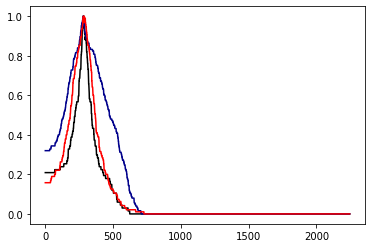

In [162]:


mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS2[1]))) for mol in ym2]
mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]

y = scipy.array([0]*Pho5.LENGTH)
for regs in mols:
    for reg in regs:
        y[reg.start:reg.end] +=1
plt.plot(y/max(y), color = 'black')

#plt.plot(y/len(mols))
    
mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS2[1]))) for mol in ym8]
mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]

y = scipy.array([0]*Pho5.LENGTH)
for regs in mols:
    for reg in regs:
        y[reg.start:reg.end] +=1
#plt.plot(y/len(mols))
plt.plot(y/max(y),color='darkblue')

    
mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(Pho5.UAS1[0],Pho5.UAS2[1]))) for mol in ym89]
mols = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]

y = scipy.array([0]*Pho5.LENGTH)
for regs in mols:
    for reg in regs:
        y[reg.start:reg.end] +=1
#plt.plot(y/len(mols),color='black')
plt.plot(y/max(y),color='red')


In [9]:
scipy.mean([mol._array_[Pho5.UAS1[0]:Pho5.UAS1[1]] for mol in ym8]), scipy.mean([mol._array_[Pho5.UAS1[0]:Pho5.UAS1[1]] for mol in ym89])

(0.3402670775552131, 0.4824784154393093)

In [822]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='red',alpha=0.75)

plt.axvline(scipy.mean([len(reg) for reg in regs]))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym19]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='gold',alpha=0.75)

plt.axvline(scipy.mean([len(reg) for reg in regs]))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='blue',alpha=0.75)

            
plt.axvline(scipy.mean([len(reg) for reg in regs]))

NameError: name 'kernal' is not defined

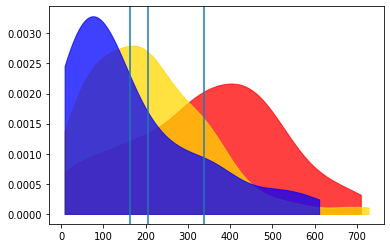

In [23]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='red',alpha=0.75)

plt.axvline(scipy.mean([len(reg) for reg in regs]))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='gold',alpha=0.75)

plt.axvline(scipy.mean([len(reg) for reg in regs]))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]
regs = [y for x in regs for y in x]
plt.fill_between(  *kernal([len(reg) for reg in regs])  ,color='blue',alpha=0.75)

            
plt.axvline(scipy.mean([len(reg) for reg in regs]))

338.6818181818182
205.87962962962962
163.26582278481013


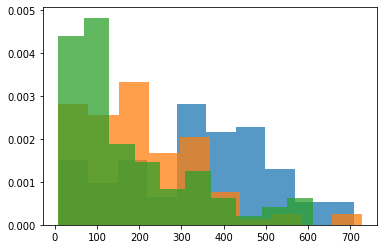

In [3]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
plt.hist([len(reg) for reg in regs],density=True,alpha=0.75)
print(scipy.mean([len(reg) for reg in regs]))
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
regs = [y for x in regs for y in x]
plt.hist([len(reg) for reg in regs],density=True,alpha=0.75)
print(scipy.mean([len(reg) for reg in regs]))
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]
regs = [y for x in regs for y in x]
plt.hist([len(reg) for reg in regs],density=True,alpha=0.75)
print(scipy.mean([len(reg) for reg in regs]))


# regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
# regs = [y for x in regs for y in x]

# plt.hist([Pho5.UAS1[0] - reg.start for reg in regs], density=True,alpha=0.75)

# regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
# regs = [y for x in regs for y in x]

# plt.hist([Pho5.UAS1[0] - reg.start for reg in regs], density=True,alpha=0.75)

# regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
# regs = [y for x in regs for y in x]

# plt.hist([reg.end - Pho5.UAS1[1] for reg in regs], density=True,alpha=0.75)

# regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
# regs = [y for x in regs for y in x]

# plt.hist([reg.end - Pho5.UAS1[1]   for reg in regs], density=True,alpha=0.75)


96.63636363636364
82.75728155339806
31.759493670886076


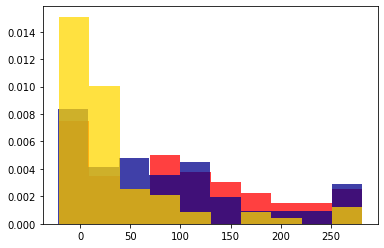

In [38]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='red')
print(scipy.mean(anal))
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym19]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='darkblue')
print(scipy.mean(anal))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='gold')
print(scipy.mean(anal))



96.63636363636364
46.148148148148145
31.759493670886076


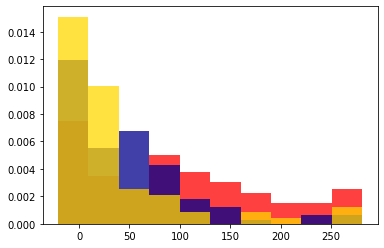

In [25]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='red')
print(scipy.mean(anal))
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='darkblue')
print(scipy.mean(anal))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym2]
regs = [y for x in regs for y in x]
anal =  [    min([Pho5.UAS1[0] - reg.start,reg.end - Pho5.UAS1[1]] )           for reg in regs]
plt.hist(anal, density=True,alpha=0.75,color='gold')
print(scipy.mean(anal))



150.3181818181818
104.77157360406092


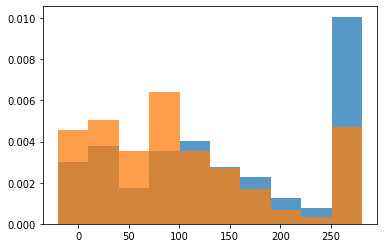

In [43]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
anal = [Pho5.UAS1[0] - reg.start for reg in regs]
plt.hist(anal, density=True,alpha=0.75)
print(scipy.mean(anal))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym208]
regs = [y for x in regs for y in x]
anal = [Pho5.UAS1[0] - reg.start for reg in regs]

plt.hist(anal, density=True,alpha=0.75)
print(scipy.mean(anal))


150.3181818181818
105.72222222222223


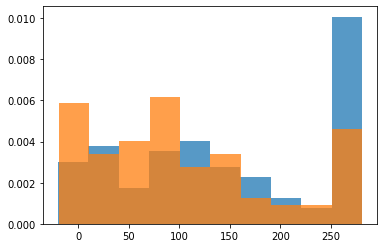

In [28]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]
anal = [Pho5.UAS1[0] - reg.start for reg in regs]
plt.hist(anal, density=True,alpha=0.75)
print(scipy.mean(anal))

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
regs = [y for x in regs for y in x]
anal = [Pho5.UAS1[0] - reg.start for reg in regs]

plt.hist(anal, density=True,alpha=0.75)
print(scipy.mean(anal))


(array([0.0062282 , 0.00664341, 0.00373692, 0.00207607, 0.00145325,
        0.00103803, 0.00062282, 0.00020761, 0.00020761, 0.00020761]),
 array([-21. ,  23.6,  68.2, 112.8, 157.4, 202. , 246.6, 291.2, 335.8,
        380.4, 425. ]),
 <a list of 10 Patch objects>)

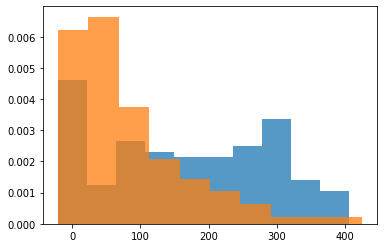

In [132]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]

plt.hist([reg.end - Pho5.UAS1[1] for reg in regs], density=True,alpha=0.75)

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym89]
regs = [y for x in regs for y in x]

plt.hist([reg.end - Pho5.UAS1[1]   for reg in regs], density=True,alpha=0.75)


(array([0.00609557, 0.00378346, 0.00367836, 0.00231211, 0.00189173,
        0.00157644, 0.00073567, 0.00031529, 0.00021019, 0.0001051 ]),
 array([-22. ,  26.3,  74.6, 122.9, 171.2, 219.5, 267.8, 316.1, 364.4,
        412.7, 461. ]),
 <a list of 10 Patch objects>)

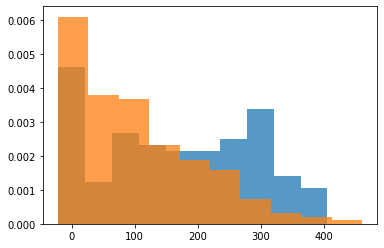

In [44]:
regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym8]
regs = [y for x in regs for y in x]

plt.hist([reg.end - Pho5.UAS1[1] for reg in regs], density=True,alpha=0.75)

regs = [list(filter(lambda reg: reg.isbubble==0, mol.getExc(*Pho5.UAS1))) for mol in ym208]
regs = [y for x in regs for y in x]

plt.hist([reg.end - Pho5.UAS1[1]   for reg in regs], density=True,alpha=0.75)


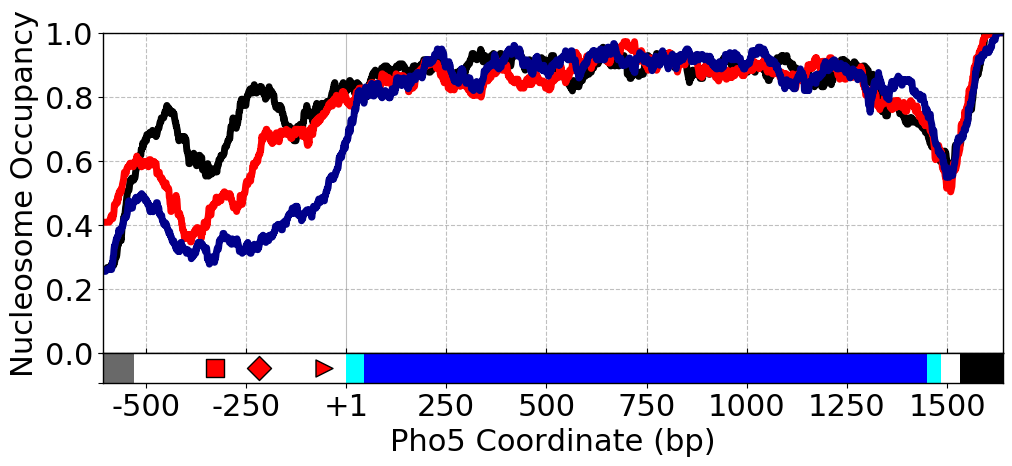

In [85]:
import matplotlib
def build_gene_plot(plt):
    fig    = plt.figure(facecolor='1',figsize=(10,4))
    ax2    = plt.axes([0.05,0.15 ,0.9 ,0.80]) 
    ax1    = plt.axes([0.05,0.075,0.9 ,0.075])
    ax1.set_facecolor('white')
    ax2.set_facecolor('white')

    ax1.tick_params(axis='y',which='both',top='off',bottom='off',labelleft='off',labelright='off',labelbottom='off')
    ax1.tick_params(axis='x',which='both',top='off',bottom='off')

    ax2.tick_params(axis='x',which='both',labelbottom='off')
    ax2.grid(color='grey',linestyle='--',alpha=0.5)
    ax1.set_xticks(range(-500,2250,250))
    ax2.set_xticks(range(-500,2250,250))
    ax2.set_xticklabels([])
    ax1.set_xticklabels(["-500","-250","+1","250","500","750","1000","1250","1500"])
    ax1.set_yticklabels([])
    [i.set_visible(True) for i in ax2.spines.values()]
    [i.set_color('black') for i in ax2.spines.values()]
    [i.set_linewidth(1) for i in   ax2.spines.values()]
    [i.set_visible(True) for i in  ax1.spines.values()]
    [i.set_color('black') for i in ax1.spines.values()]
    [i.set_linewidth(1) for i in   ax1.spines.values()]
    ax2.get_xgridlines()[2].set_linestyle('-')

    patches = [
                matplotlib.patches.Rectangle((0   -Pho5.TSS ,    0), 4   , 1, facecolor='black'  ), #lexa
                matplotlib.patches.Rectangle((4   -Pho5.TSS ,    0), 74  , 1, facecolor='dimgrey'), #zrux
                #matplotlib.patches.Circle   ((281 -Pho5.TSS ,    0.5), radius=50, facecolor='black'),#'gold'   ), #uas1
                #matplotlib.patches.Rectangle((391 -Pho5.TSS ,    0), 21  , 1, facecolor='black'),#'red'    ), #uass2
                #matplotlib.patches.Rectangle((551 -Pho5.TSS ,    0), 6   , 1, facecolor='black'),#'green'  ), #TATA
                matplotlib.patches.Rectangle((607 -Pho5.TSS ,    0), 1484, 1, facecolor='cyan'   ), #Pho5.TSS 
                matplotlib.patches.Rectangle((652 -Pho5.TSS ,    0), 1404, 1, facecolor='blue'   ), #orf
                matplotlib.patches.Rectangle((2140-Pho5.TSS ,    0), 106 , 1, facecolor='black'  ), #lexa
    ]
    [ax1.add_patch(p)  for p in patches]

    ax1.scatter(281 - Pho5.TSS ,0.5 , s=150,c='red',marker='s', edgecolors='black')
    ax1.scatter(391 -Pho5.TSS  ,0.5 , s=150,c='red',marker='D', edgecolors='black')
    ax1.scatter(551 -Pho5.TSS,0.5 , s=150  ,c='red',marker='>', edgecolors='black')
    #ax1.grid(False)
    ax2.set_ylim([0,1])
    ax2.set_xlim([0-607,2246-607])
    ax1.set_xlim([0-607,2246-607])
    ax1.set_ylim([0,1])
    ##arrow
    #ax2.plot((0,0)  ,(0, 0.075)    ,linewidth=4, color='black')
    #ax2.plot((0,120),(0.075,0.075)  ,linewidth=4, color='black')
    #ax2.arrow(80,0.075,0.01,0,  color='black',head_starts_at_zero=True,head_length=35)
    return(fig,ax2)
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 22})

fig,ax=build_gene_plot(plt)
plt.xlabel("Pho5 Coordinate (bp)")
ax.set_ylabel("Nucleosome Occupancy")
params = {"linewidth":5}
ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym2),color='black',**params)

ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym89),color='red',**params)
ax.plot(Pho5.POSITIONS, Molecules.rvalue(ym8 ),color='darkblue',**params )
fig.savefig(r'C:\Users\Robert Shelansky\Desktop\chromatin.svg',format='svg',transparent=True)

In [166]:
len(x[0]._array_)

2246

In [14]:
0.48-0.34

0.13999999999999996

NameError: name 'plt' is not defined

In [876]:
###################################
##CODE THE SETS UP THE ENVIRONMENT###########################################################################
###################################                                                                         
import sympy                                                                                                
import string                                                                                               
import itertools
simplify   = sympy.simplify
symbols= ["".join(l) for l in itertools.product(string.ascii_letters+" ",string.ascii_letters+" ")]
for symbol in symbols:
    try: exec("{0}=sympy.symbols ('{0}' , positive=True ,real=True)".format(symbol))
    except: pass
#############################################################################################################
##Dont forget the outer list '[]', or the inner/outer ',' do this [[...,...,...,],[...,...,...],[...,...,...]]


W          = [[-a, b],
              [ a,-b]]


W          = [[ -k-l,c   ,0   ,b   ],
              [ k   ,-c-a,b   ,0   ],
              [ 0   , a  ,-b-c,k   ],
              [ l   , 0  , c  ,-b-k]]


#######################################################
##CODE THAT DOUBLE CHECKS THE MATRIX#                #
##################################################################################################################### 
assert all(len(row) == len(W[0]) for row in W)          , 'Rows are of Unequal Length.'                             #
Wtrans = list(map(list, zip(*W)))                                                                                   #
assert all(len(col) == len(Wtrans[0]) for col in Wtrans), 'Cols are of Unequal Lentgh'                              #
assert all(len(col) == len(W[0]) for col in Wtrans)     , 'Cols and Rows have different Lengths'                    #
Wt = sympy.Matrix(W)                                                                                                #
for i,col in enumerate(Wtrans):                                                                                     #
    assert   sum(col)==0, 'Column {}: Does not sum to 0 it sums to {}.'.format(i,sum(col))                          #
assert sympy.det(Wt)==0, 'Check Wheather Columns Sum to 0.'                                                         #
#####################################################################################################################

###################################
##CODE THAT COMPUTES SPECIFICITY#######################
###################################                   #
Wt          = sympy.Matrix(W)                         # 
kernal      = sympy.simplify(Wt.nullspace()[0])       #
Pi          = list(sympy.simplify(kernal/sum(kernal)))#
#######################################################
###################################
##CODE COMPUTS THE ACF          #######################
###################################
eigenvalues,eigenvectors = zip(*[[ value,vector] for   value, multiplicity, vector in  Wt.eigenvects()])
eigenspace               = sympy.Matrix([list(sympy.simplify(vector[0])) for vector in eigenvectors]).transpose()
assert eigenspace.shape[1] == len(eigenvalues), "Eigenvalues And Eigenvectors Do Not Match In Length"
L   = eigenvalues
B   = eigenspace


In [882]:
B.inv(method = 'LU')

KeyboardInterrupt: 

In [881]:
B.inv?